In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_log = pd.read_csv("C:/Users/djcsr/Documents/Semester 9/CGS4144 Bioinformatics/Analysis/data/SRP073813/SRP073813_log.csv")
df_meta = pd.read_csv("C:/Users/djcsr/Documents/Semester 9/CGS4144 Bioinformatics/Analysis/data/SRP073813/SRP073813_meta.csv")

In [4]:
df_log.set_index("HUGO", inplace = True)
df_meta.set_index("ID", inplace = True)
df_meta = df_meta['refinebio_subject']

In [5]:
df_meta = df_meta.to_frame()

In [6]:
df_log =round(df_log)
df_log = df_log.T

In [7]:
df_log = df_log.loc[:, ~df_log.columns.duplicated()]
df_log = df_log.join(df_meta)

In [8]:
df_log = df_log[df_log["refinebio_subject"].str.contains('nacc')]
df_meta = df_meta[df_meta["refinebio_subject"].str.contains('nacc')]

In [9]:
df_log.drop("refinebio_subject", axis = 1, inplace = True)

In [10]:
dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject") 

C:\Users\djcsr\AppData\Local\Temp\ipykernel_2800\2207402584.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject")
C:\Users\djcsr\AppData\Local\Programs\Python\Python39\lib\site-packages\pydeseq2\dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [11]:
dds.deseq2()

Fitting size factors...
... done in 0.09 seconds.

Fitting dispersions...
... done in 4.04 seconds.

Fitting dispersion trend curve...
... done in 4.06 seconds.

C:\Users\djcsr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\djcsr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
... done in 15.43 seconds.

Fitting LFCs...
... done in 2.17 seconds.

Refitting 0 outliers.



In [12]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [13]:
import scanpy as sc

In [14]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [15]:
sc.tl.pca(dds)

C:\Users\djcsr\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


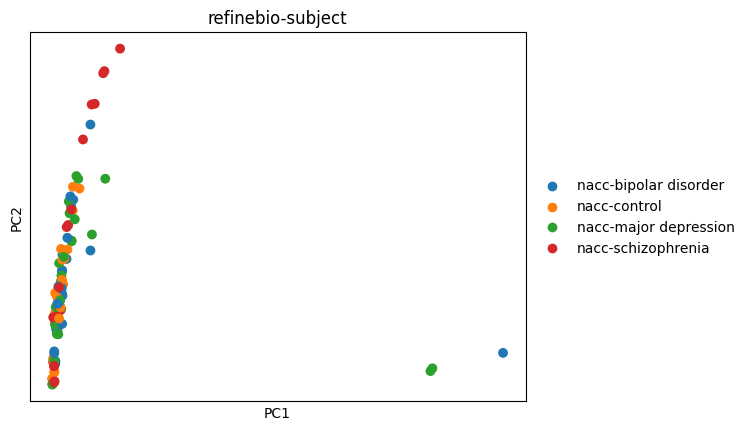

In [16]:
sc.pl.pca(dds, size = 200, color ='refinebio-subject')

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns

In [18]:
model = TSNE(learning_rate = 50)
tsne_features = model.fit_transform(df_log.to_numpy())

In [19]:
df_log['x'] = tsne_features[:,0]
df_log['y'] = tsne_features[:,1]
df_log =df_log.join(df_meta)

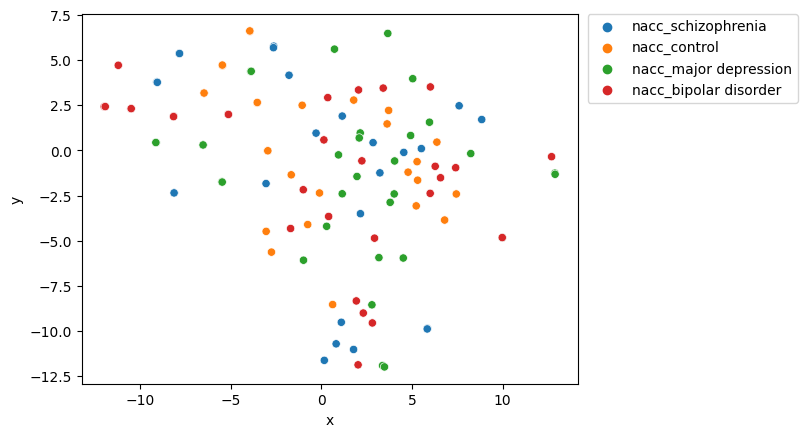

In [20]:
sns.scatterplot(x = 'x', y = 'y', hue = 'refinebio_subject', data=df_log)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [21]:
df_log

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,LOC728392,CPLANE1-AS1,NOTCH2NLC,ARMCX5-GPRASP2,LOC112268419,LOC124903324,LOC114841035,x,y,refinebio_subject
SRR3438559,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,1.0,2.0,2.0,2.0,1.0,3.0,-3.054623,-1.829752,nacc_schizophrenia
SRR3438560,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,4.0,2.0,2.0,2.0,2.0,1.0,2.0,-1.664070,-1.346016,nacc_control
SRR3438561,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,1.0,2.0,2.0,2.0,1.0,2.0,-1.061118,2.503054,nacc_control
SRR3438562,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,1.0,2.0,2.0,2.0,1.0,3.0,-1.786043,4.165816,nacc_schizophrenia
SRR3438615,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,2.0,2.0,2.0,2.0,1.0,3.0,-3.543692,2.634185,nacc_control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3438899,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,4.0,1.0,2.0,2.0,2.0,1.0,3.0,5.965712,1.565015,nacc_major depression
SRR3438902,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,...,3.0,1.0,2.0,2.0,2.0,1.0,2.0,5.840963,-9.875812,nacc_schizophrenia
SRR3438903,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,3.0,1.0,3.0,2.0,2.0,1.0,2.0,0.814242,-10.699077,nacc_schizophrenia
SRR3438904,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,...,3.0,1.0,2.0,2.0,2.0,1.0,2.0,0.161134,-11.613542,nacc_schizophrenia


In [22]:
df_meta

,refinebio_subject
ID,
SRR3438559,nacc_schizophrenia
SRR3438560,nacc_control
SRR3438561,nacc_control
SRR3438562,nacc_schizophrenia
SRR3438615,nacc_control
...,...
SRR3438899,nacc_major depression
SRR3438902,nacc_schizophrenia
SRR3438903,nacc_schizophrenia


In [23]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'refinebio-subject_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [70]:
%pip install sanbomics

Note: you may need to restart the kernel to use updated packages.


In [71]:
dds.obs

,refinebio-subject
ID,
SRR3438559,nacc-schizophrenia
SRR3438560,nacc-control
SRR3438561,nacc-control
SRR3438562,nacc-schizophrenia
SRR3438615,nacc-control
...,...
SRR3438899,nacc-major depression
SRR3438902,nacc-schizophrenia
SRR3438903,nacc-schizophrenia


In [129]:
stat_res_schizo = DeseqStats(dds, contrast = ('refinebio-subject','nacc-schizophrenia','nacc-control'))

In [130]:
stat_res_schizo.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: refinebio-subject nacc-schizophrenia vs nacc-control


... done in 3.84 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.023925,0.279246,-0.085676,0.931724,0.999947
TNMD,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947
DPM1,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
SCYL3,2.040712,-0.000026,0.283145,-0.000093,0.999926,0.999947
FIRRM,2.022954,-0.000026,0.283145,-0.000093,0.999926,0.999947
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.023925,0.279246,-0.085676,0.931724,0.999947
ARMCX5-GPRASP2,2.014075,0.026941,0.284427,0.094719,0.924538,0.999947
LOC112268419,1.916403,0.052111,0.291529,0.178751,0.858133,0.999947
LOC124903324,1.037365,-0.000026,0.400428,-0.000066,0.999947,0.999947


In [131]:
res_schizo = stat_res_schizo.results_df

In [132]:
res_schizo['Symbol'] = res_schizo.index

In [147]:
res_schizo_adj = res_schizo[res_schizo.baseMean > 5]

In [148]:
res_schizo_adj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
TSPOAP1,5.050758,0.022196,0.179029,0.123978,0.901333,0.999947,TSPOAP1
RHBDD2,5.130668,-0.052494,0.177533,-0.295685,0.767470,0.999947,RHBDD2
GAS7,6.237185,-0.023925,0.161223,-0.148395,0.882031,0.999947,GAS7
PKD1,6.033818,0.045629,0.164186,0.277909,0.781082,0.999947,PKD1
MAPK8IP2,5.296844,-0.068904,0.174971,-0.393803,0.693727,0.999947,MAPK8IP2
...,...,...,...,...,...,...,...
GTF2I,5.287122,0.038073,0.173422,0.219542,0.826228,0.999947,GTF2I
DYNLL2,5.290494,-0.025497,0.174190,-0.146375,0.883626,0.999947,DYNLL2
NUDT3,5.242055,-0.007936,0.176733,-0.044905,0.964183,0.999947,NUDT3
GRIN2B,5.145054,-0.053740,0.178211,-0.301552,0.762994,0.999947,GRIN2B


In [118]:
sigs_schizo = res_schizo[(res_schizo.padj < 0.05)]

In [116]:
sigs_schizo

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol


In [119]:
stat_res_dep = DeseqStats(dds, contrast = ('refinebio-subject','nacc-major depression','nacc-control'))

In [120]:
stat_res_dep.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: refinebio-subject nacc-major depression vs nacc-control


... done in 3.96 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155
TNMD,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155
LOC112268419,1.916403,0.040072,0.275224,0.145599,0.884238,0.999155
LOC124903324,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155


In [149]:
res_dep = stat_res_dep.results_df

In [150]:
res_dep['Symbol'] = res_dep.index

In [151]:
res_dep

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
TSPAN6,2.076229,-0.009770,0.262113,-0.037272,0.970268,0.999155,TSPAN6
TNMD,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155,TNMD
DPM1,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155,DPM1
SCYL3,2.040712,0.042698,0.264726,0.161291,0.871864,0.999155,SCYL3
FIRRM,2.022954,-0.001696,0.266581,-0.006363,0.994923,0.999155,FIRRM
...,...,...,...,...,...,...,...
NOTCH2NLC,2.085109,0.033299,0.260338,0.127908,0.898222,0.999155,NOTCH2NLC
ARMCX5-GPRASP2,2.014075,0.025271,0.267941,0.094315,0.924859,0.999155,ARMCX5-GPRASP2
LOC112268419,1.916403,0.040072,0.275224,0.145599,0.884238,0.999155,LOC112268419
LOC124903324,1.037365,0.085767,0.371893,0.230622,0.817609,0.999155,LOC124903324


In [78]:
stat_res_bipolar = DeseqStats(dds, contrast = ('refinebio-subject','nacc-bipolar disorder','nacc-control'))

In [79]:
stat_res_bipolar.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: refinebio-subject nacc-bipolar disorder vs nacc-control


... done in 1.23 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,2.076229,-0.029461,0.268061,-0.109902,0.912487,0.999556
TNMD,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556
DPM1,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
SCYL3,2.040712,-0.001241,0.271701,-0.004566,0.996357,0.999556
FIRRM,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556
...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556
ARMCX5-GPRASP2,2.014075,0.025726,0.273036,0.094223,0.924932,0.999556
LOC112268419,1.916403,0.034503,0.280704,0.122914,0.902175,0.999556
LOC124903324,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556


In [80]:
res_bipolar = stat_res_bipolar.results_df

In [81]:
res_bipolar['Symbol'] = res_bipolar.index

In [89]:
res_bipolar

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
TSPAN6,2.076229,-0.029461,0.268061,-0.109902,0.912487,0.999556,TSPAN6
TNMD,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556,TNMD
DPM1,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556,DPM1
SCYL3,2.040712,-0.001241,0.271701,-0.004566,0.996357,0.999556,SCYL3
FIRRM,2.022954,-0.001241,0.271701,-0.004566,0.996357,0.999556,FIRRM
...,...,...,...,...,...,...,...
NOTCH2NLC,2.085109,-0.053708,0.269156,-0.199543,0.841838,0.999556,NOTCH2NLC
ARMCX5-GPRASP2,2.014075,0.025726,0.273036,0.094223,0.924932,0.999556,ARMCX5-GPRASP2
LOC112268419,1.916403,0.034503,0.280704,0.122914,0.902175,0.999556,LOC112268419
LOC124903324,1.037365,0.023007,0.382710,0.060116,0.952063,0.999556,LOC124903324


In [25]:
#volcano
from sanbomics.plots import volcano

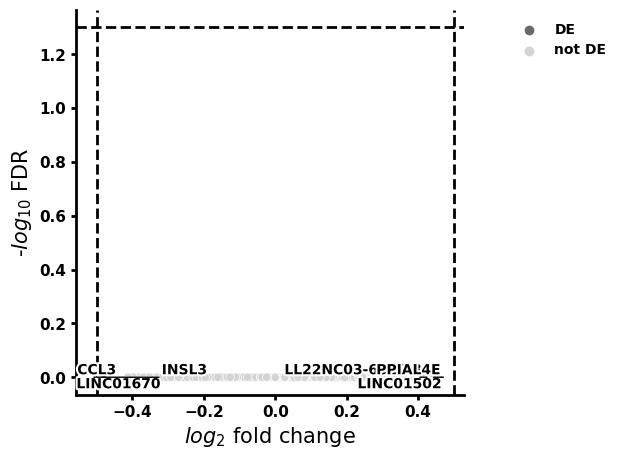

In [114]:
volcano(res_schizo, pval_thresh = 0.05,
           log2fc_thresh = 0.5,
           to_label = 3,  symbol= 'Symbol')

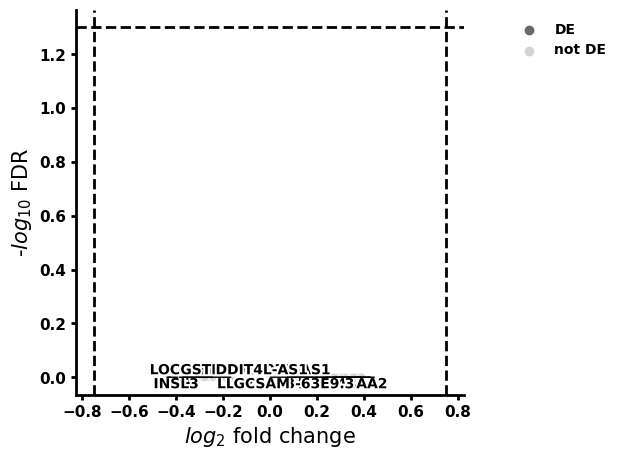

In [82]:
volcano(res_bipolar, symbol='Symbol')

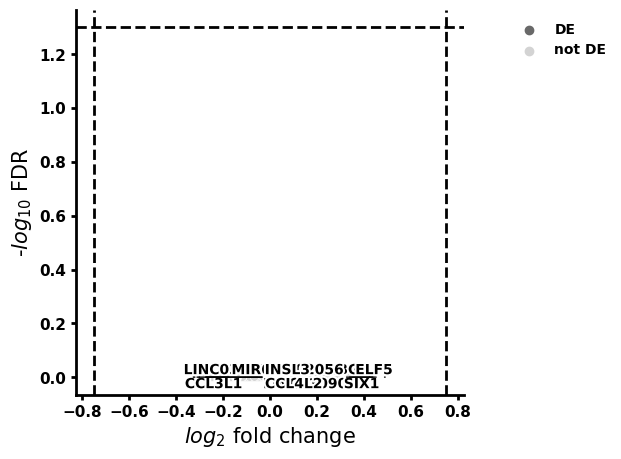

In [152]:
volcano(res_dep, symbol='Symbol')